In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
#read data
data=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
#understanding the data
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.shape

(205, 26)

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Cleaning the data

In [11]:
data.duplicated().sum() # No duplicates

0

In [12]:
data.isnull().sum() #No null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Data Visualisation

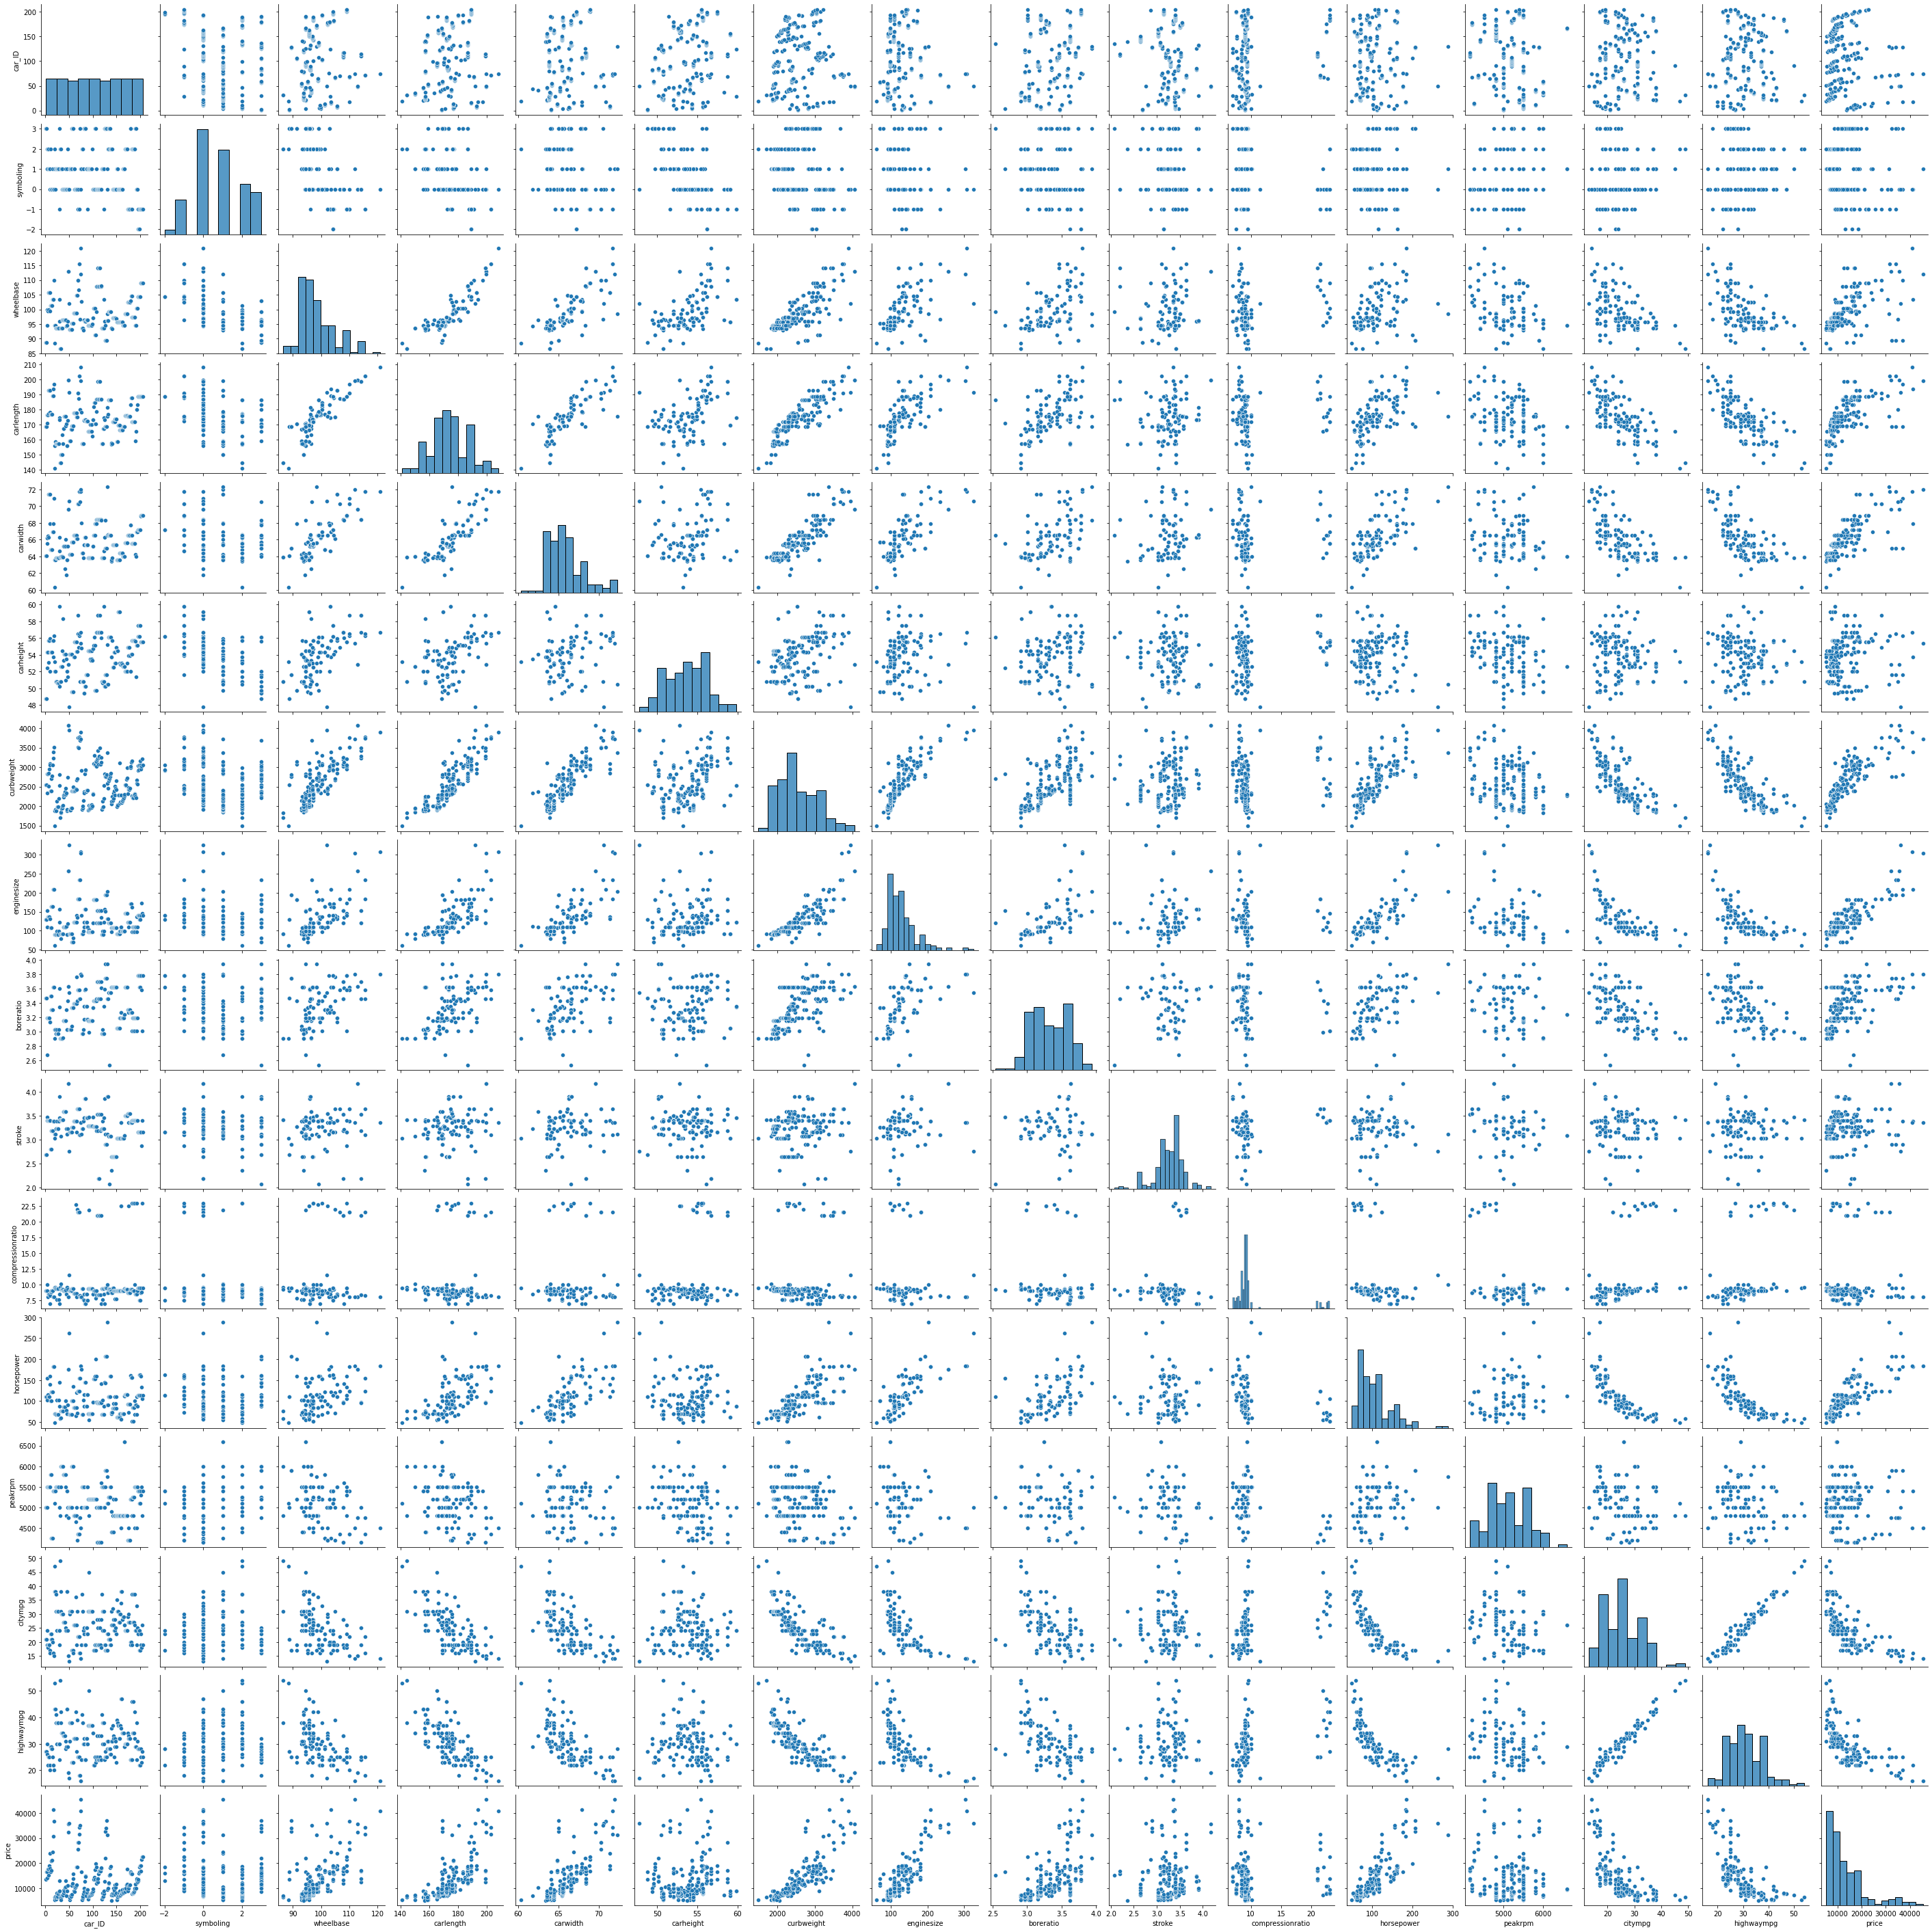

In [8]:
#visualizing the numerical variables
sns.pairplot(data)
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [71]:
# separating categorical and numerical variables
num_vars=['car_ID','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
cat_vars=['symboling','CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

num_vars.remove('car_ID')#removing index
print(num_vars)
print(cat_vars)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

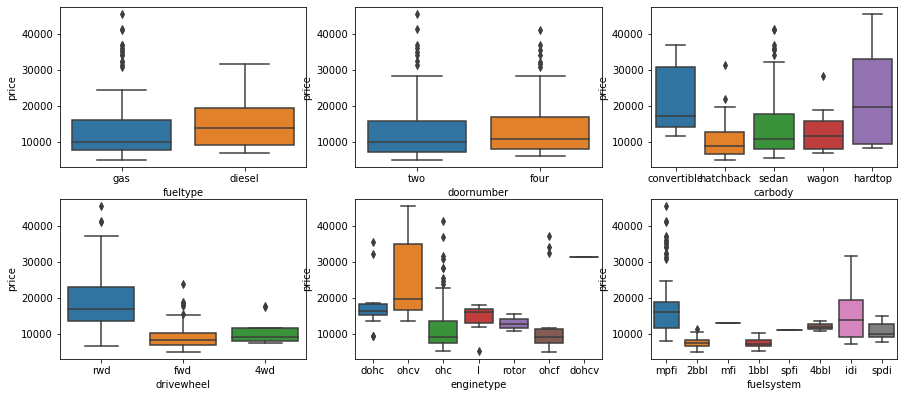

In [7]:
#visualising categorical variables
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(x='fueltype',y='price',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='doornumber',y='price',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='carbody',y='price',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='drivewheel',y='price',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='enginetype',y='price',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='fuelsystem',y='price',data=data)


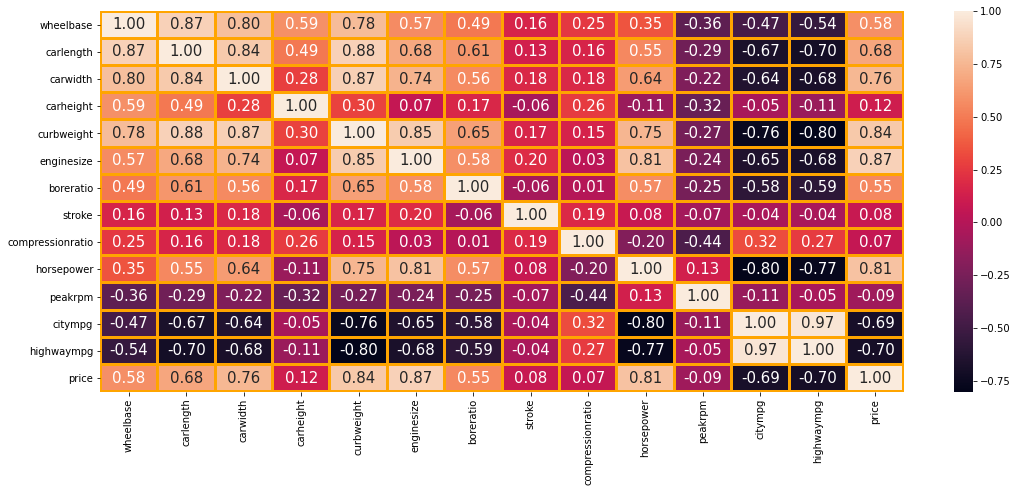

In [9]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(data[num_vars].corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

### Inferences
    - wheelbase have positive correlation with price of 58%.
    - car length and car width have positive correlation with price of 68% and 76%.
    - curbweight have positive correlation with price of 84%.
    - enginesize have positive correlation with price of 87%.
    - boreratio have positive correlation with price of 55%.
    - horsepower have positive correlation with price of 81%.
    - citympg and highwaympg have negative correlation with price of 69% and 70%.

## Preparing the data

In [73]:
#extracting company name
companyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",companyName)

In [74]:
companyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [75]:
# making the company names consistence
data['CompanyName'] = data['CompanyName'].str.lower()

data["CompanyName"].replace('maxda','mazda',inplace=True)
data["CompanyName"].replace('porcshce','porsche',inplace=True)
data["CompanyName"].replace('toyouta','toyota',inplace=True)
data["CompanyName"].replace('vokswagen','volkswagen',inplace=True)
data["CompanyName"].replace('vw','volkswagen',inplace=True)
data["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [76]:
# drop the index from dataset
data.drop(columns = ['car_ID','CarName'], axis = 1, inplace = True)

In [77]:
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [32]:
data.shape

(205, 25)

In [13]:
data['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [34]:
data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [78]:
#encoding categorical variables
var_list=['doornumber','cylindernumber']
data[var_list]=data[var_list].apply(lambda x: x.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}))
data[var_list]

,doornumber,cylindernumber
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5
...,...,...
200,4,4
201,4,4
202,4,6
203,4,6


In [79]:
#encoding categorical variables by creating dummies
data = pd.get_dummies(data, columns=['CompanyName','fueltype','aspiration','carbody','drivewheel','enginelocation','fuelsystem','cylindernumber','enginetype'],drop_first=True)

In [16]:
data.head() # checking the new dataset

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,0,0,0,0,0,1,0
3,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,0,0,0,0,0,1,0,0,0


In [47]:
data.shape # increase in number of columns

(205, 65)

In [49]:
data.info() # dummy variables made and original columns dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   enginesize              205 non-null    int64  
 8   boreratio               205 non-null    float64
 9   stroke                  205 non-null    float64
 10  compressionratio        205 non-null    float64
 11  horsepower              205 non-null    int64  
 12  peakrpm                 205 non-null    int64  
 13  citympg                 205 non-null    int64  
 14  highwaympg              205 non-null    in

## Splitting the dataset

In [80]:
#splitting the data 80-20 into train set and test set respectively
data_train, data_test = train_test_split(data, train_size=0.8,test_size=0.2,random_state=10)

In [18]:
data_train.shape

(164, 65)

In [19]:
data_test.shape

(41, 65)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   enginesize              205 non-null    int64  
 8   boreratio               205 non-null    float64
 9   stroke                  205 non-null    float64
 10  compressionratio        205 non-null    float64
 11  horsepower              205 non-null    int64  
 12  peakrpm                 205 non-null    int64  
 13  citympg                 205 non-null    int64  
 14  highwaympg              205 non-null    in

## Rescaling the features

In [81]:
scaler=MinMaxScaler() # object insantiation

In [82]:
#numerical variables to be normalised
num_vars=['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','compressionratio','stroke','horsepower','peakrpm','citympg','highwaympg','price']

In [83]:
data_train[num_vars]=scaler.fit_transform(data_train[num_vars]) #using fit_transform func

In [23]:
data_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
160,0.4,1.0,0.265306,0.376119,0.350427,0.381818,0.235066,0.149798,0.464286,0.457143,...,0,0,0,0,0,0,1,0,0,0
98,0.8,0.0,0.247813,0.317910,0.299145,0.409091,0.201707,0.145749,0.435714,0.580952,...,0,0,0,0,0,0,1,0,0,0
127,1.0,0.0,0.084548,0.414925,0.401709,0.254545,0.491854,0.538462,0.857143,0.395238,...,0,1,0,0,0,0,0,1,0,0
47,0.4,1.0,0.769679,0.873134,0.794872,0.363636,1.000000,0.797571,0.778571,1.000000,...,0,1,0,0,0,0,0,0,0,0
91,0.6,0.0,0.230321,0.361194,0.299145,0.518182,0.166796,0.145749,0.435714,0.580952,...,0,0,0,0,0,0,1,0,0,0


In [24]:
data_train.describe() #max-1 min-0 

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.00000,164.0,164.0,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.571951,0.573171,0.347845,0.482945,0.467688,0.449113,0.403787,0.259825,0.560540,0.559698,...,0.042683,0.109756,0.02439,0.0,0.0,0.054878,0.737805,0.085366,0.048780,0.012195
std,0.252484,0.496132,0.176961,0.189066,0.178368,0.218555,0.199328,0.165111,0.195294,0.154658,...,0.202760,0.313543,0.15473,0.0,0.0,0.228440,0.441175,0.280281,0.216069,0.110092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.230321,0.376119,0.316239,0.281818,0.247673,0.145749,0.432143,0.490476,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.288630,0.467164,0.435897,0.481818,0.354926,0.198381,0.550000,0.576190,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,0.434402,0.608955,0.538462,0.620455,0.556342,0.323887,0.750000,0.633333,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
data_train.corr() #checking correlation of features

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
symboling,1.000000,-0.634893,-0.536496,-0.354779,-0.215506,-0.511972,-0.210654,-0.065888,-0.155002,0.034915,...,-0.072341,0.023627,-0.013789,NaN,NaN,-0.122063,-0.066428,0.051381,0.047726,0.188949
doornumber,-0.634893,1.000000,0.450592,0.414104,0.223010,0.508269,0.205467,0.023462,0.147120,-0.062227,...,0.060243,-0.051943,-0.023390,NaN,NaN,0.153810,0.018116,-0.001076,-0.090730,-0.128757
wheelbase,-0.536496,0.450592,1.000000,0.874079,0.804634,0.587936,0.783684,0.595457,0.501143,0.114439,...,0.188840,0.150351,0.332989,NaN,NaN,0.370425,-0.228101,-0.194140,0.223375,-0.059329
carlength,-0.354779,0.414104,0.874079,1.000000,0.850115,0.507875,0.880452,0.687719,0.621235,0.095410,...,0.202071,0.268563,0.301644,NaN,NaN,0.233599,-0.270859,-0.119060,0.249344,-0.039217
carwidth,-0.215506,0.223010,0.804634,0.850115,1.000000,0.306955,0.872808,0.743084,0.565893,0.164797,...,0.350814,0.241944,0.433414,NaN,NaN,0.200142,-0.287902,-0.123842,0.439794,-0.003843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
enginetype_l,-0.122063,0.153810,0.370425,0.233599,0.200142,0.303153,0.224275,-0.006316,0.136258,-0.137950,...,-0.050881,-0.084609,-0.038100,NaN,NaN,1.000000,-0.404216,-0.073616,-0.054568,-0.026774
enginetype_ohc,-0.066428,0.018116,-0.228101,-0.270859,-0.287902,-0.011392,-0.387588,-0.346571,-0.434123,0.389231,...,0.125875,-0.322898,-0.265234,NaN,NaN,-0.404216,1.000000,-0.512480,-0.379875,-0.186387
enginetype_ohcf,0.051381,-0.001076,-0.194140,-0.119060,-0.123842,-0.050653,-0.074691,0.003502,0.359731,-0.537481,...,-0.064509,0.102162,-0.048305,NaN,NaN,-0.073616,-0.512480,1.000000,-0.069183,-0.033945
enginetype_ohcv,0.047726,-0.090730,0.223375,0.249344,0.439794,-0.069941,0.396137,0.553209,0.186093,-0.033477,...,-0.047817,0.282716,0.698212,NaN,NaN,-0.054568,-0.379875,-0.069183,1.000000,-0.025162


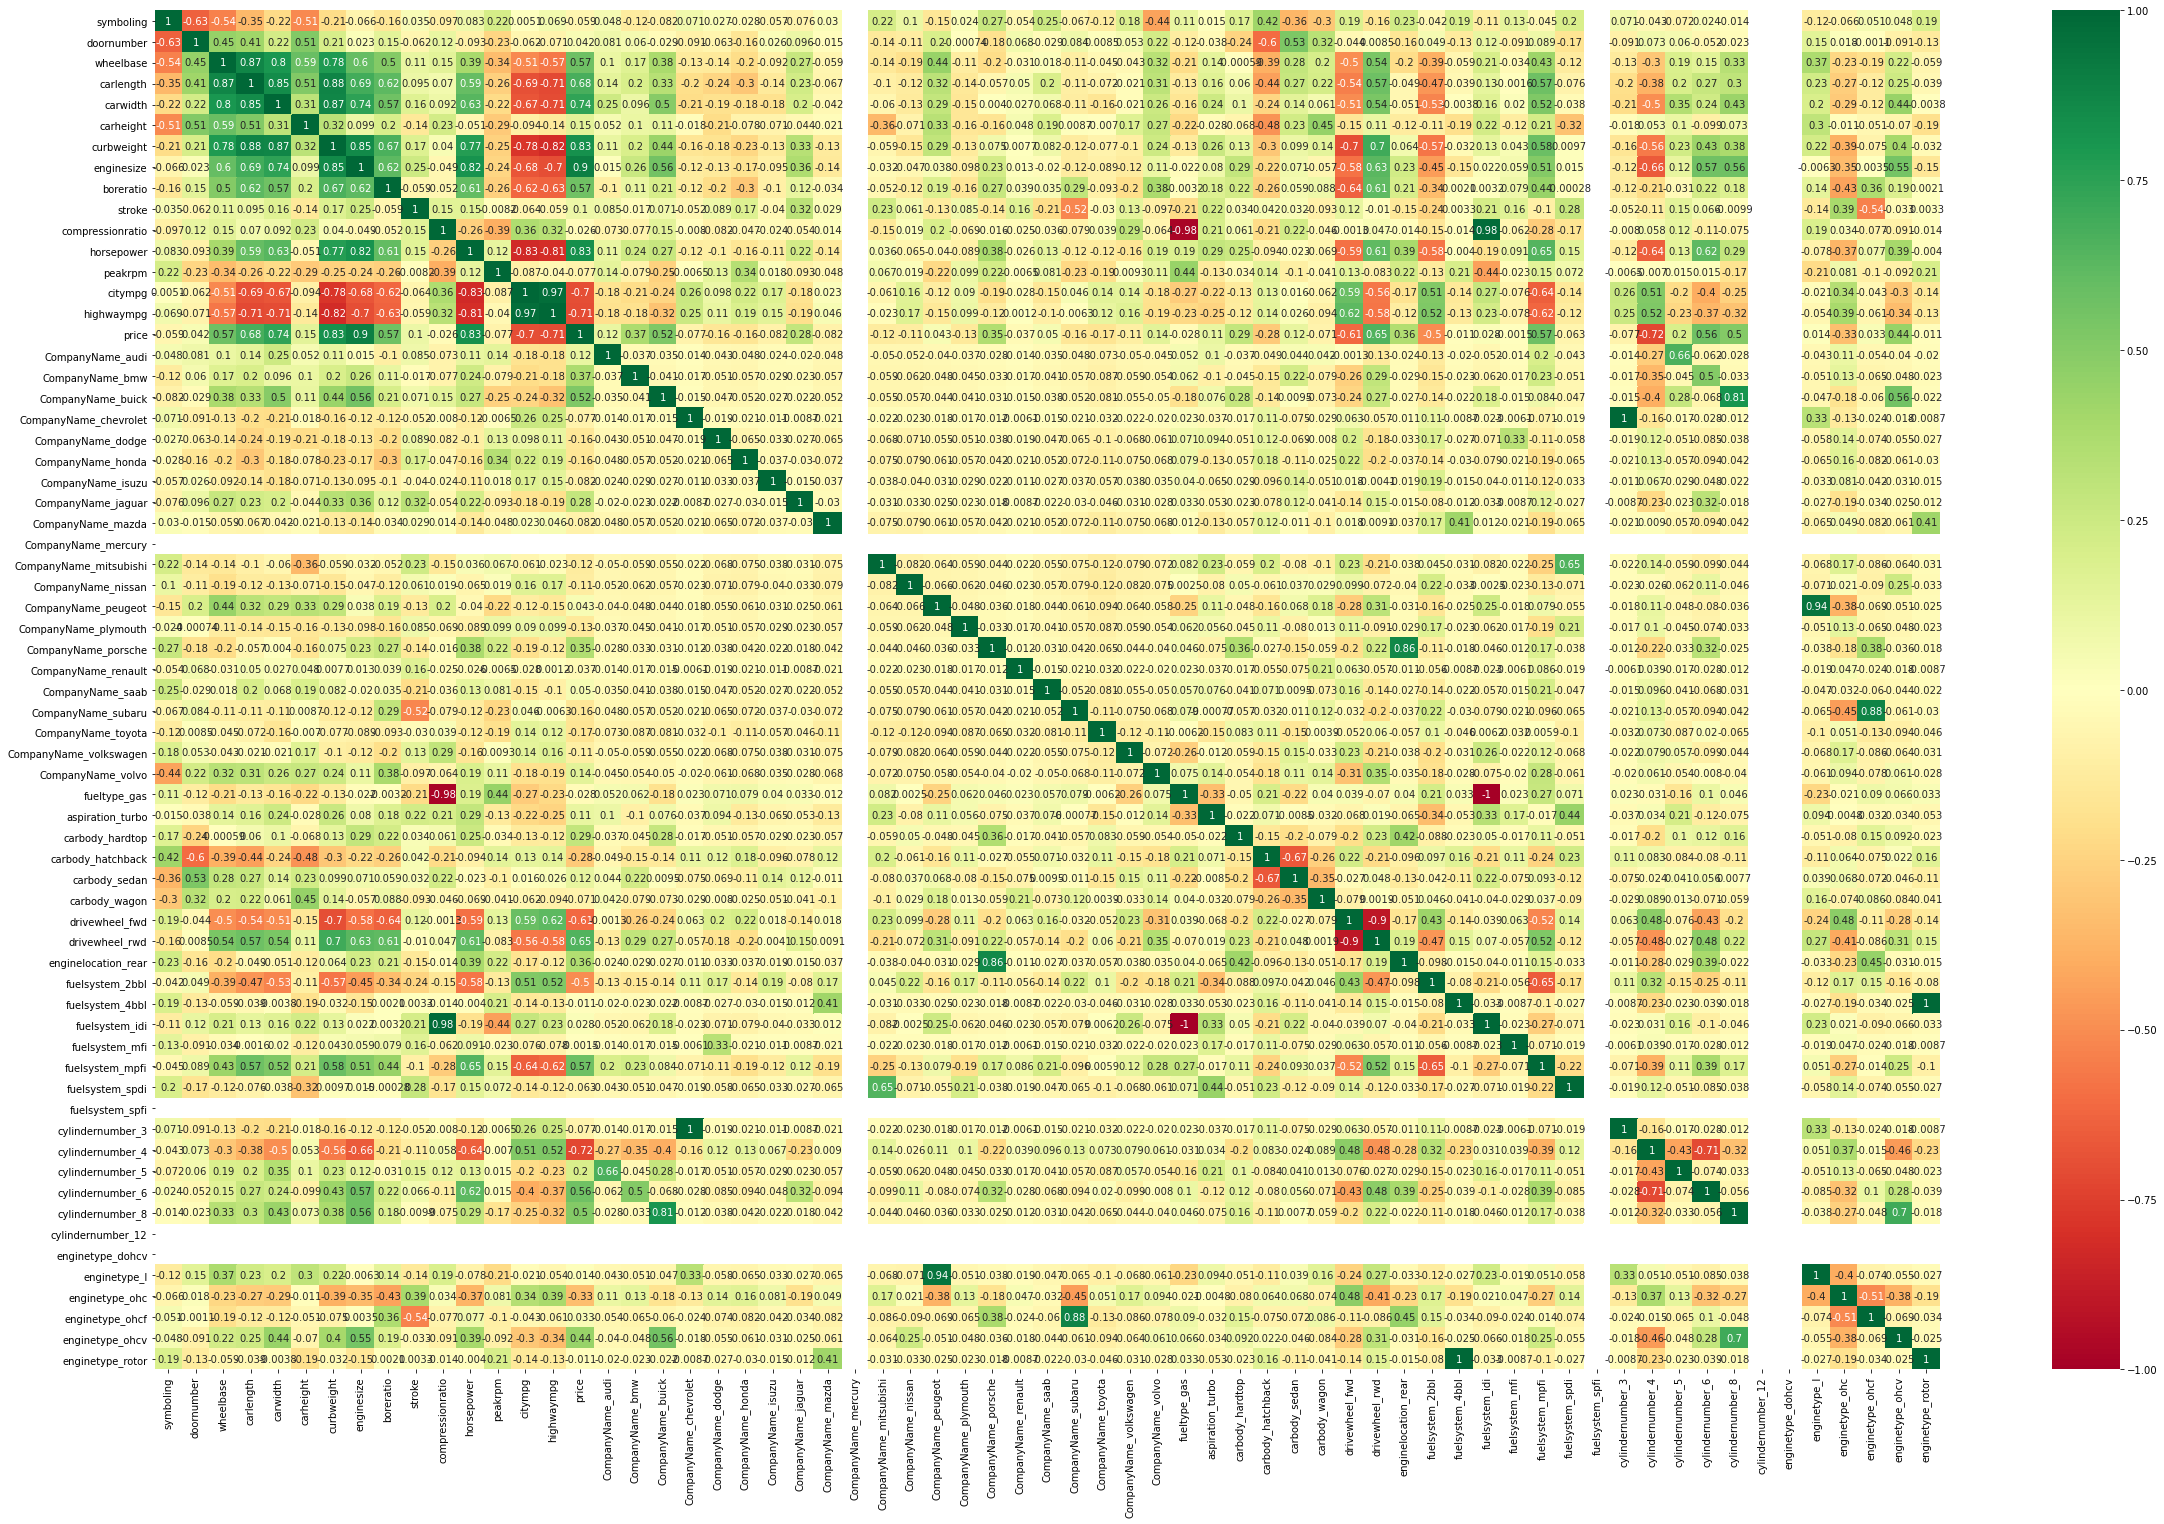

In [77]:
plt.figure(figsize = (40, 25))
sns.heatmap(data_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [84]:
# defining x and y for prediction
y_train = data_train.pop('price')
X_train = data_train

In [26]:
y_train

160    0.065041
98     0.077727
127    0.717690
47     0.673551
91     0.038007
         ...   
113    0.287399
64     0.152103
15     0.636562
125    0.419542
9      0.316299
Name: price, Length: 164, dtype: float64

## Building the model

In [85]:
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const               0.024274
symboling          -0.017037
doornumber          0.007410
wheelbase           0.193286
carlength          -0.195801
                      ...   
enginetype_l       -0.007823
enginetype_ohc     -0.005078
enginetype_ohcf     0.072334
enginetype_ohcv    -0.039558
enginetype_rotor    0.074113
Length: 65, dtype: float64

In [28]:
lr.params

const               0.024274
symboling          -0.017037
doornumber          0.007410
wheelbase           0.193286
carlength          -0.195801
                      ...   
enginetype_l       -0.007823
enginetype_ohc     -0.005078
enginetype_ohcf     0.072334
enginetype_ohcv    -0.039558
enginetype_rotor    0.074113
Length: 65, dtype: float64

In [29]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     60.02
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           3.37e-61
Time:                        23:21:29   Log-Likelihood:                 310.32
No. Observations:                 164   AIC:                            -510.6
Df Residuals:                     109   BIC:                            -340.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0243      0.080      0.304      0.761      -0.134       0.182
symboling                 -0.0170      0.036     -0.474      0.637      -0.088       0.054
doornumber                 0.0074      0.014      0.543      0.588      -0.020       0.034
wheelbase                  0.1933      0.089      2.179      0.031       0.017       0.369
carlength                 -0.1958      0.093     -2.102      0.038      -0.380      -0.011
carwidth                   0.1821      0.080      2.286      0.024       0.024       0.340
carheight                 -0.0621      0.043     -1.461      0.147      -0.146       0.022
curbweight                 0.4168      0.121      3.447      0.001       0.177       0.656
enginesize                 0.5929      0.172      3.456      0.001       0.253       0.933
boreratio                 -0.0726      0.073     -0.995      0.322      -0.217       0.072
stroke                    -0.1184      0.068     -1.738      0.085      -0.253       0.017
compressionratio          -0.2613      0.224     -1.167      0.246      -0.705       0.182
horsepower                 0.0029      0.106      0.027      0.978      -0.207       0.213
peakrpm                    0.1400      0.047      2.985      0.004       0.047       0.233
citympg                   -0.0113      0.135     -0.084      0.933      -0.279       0.256
highwaympg                 0.1072      0.127      0.841      0.402      -0.145       0.360
CompanyName_audi           0.0994      0.088      1.131      0.261      -0.075       0.274
CompanyName_bmw            0.2540      0.087      2.920      0.004       0.082       0.426
CompanyName_buick          0.1123      0.089      1.257      0.211      -0.065       0.289
CompanyName_chevrolet      0.0606      0.032      1.879      0.063      -0.003       0.125
CompanyName_dodge         -0.0370      0.080     -0.464      0.643      -0.195       0.121
CompanyName_honda          0.0274      0.087      0.314      0.754      -0.145       0.200
CompanyName_isuzu          0.0244      0.081      0.300      0.765      -0.137       0.186
CompanyName_jaguar         0.0528      0.093      0.566      0.573      -0.132       0.238
CompanyName_mazda          0.0369      0.072      0.509      0.612      -0.107       0.180
CompanyName_mercury     2.482e-16   1.86e-16      1.334      0.185   -1.21e-16    6.17e-16
CompanyName_mitsubishi    -0.0535      0.077     -0.696      0.488      -0.206       0.099
CompanyName_nissan         0.0226      0.076      0.297      0.767      -0.128       0.173
CompanyName_peugeot       -0.0684      0.037     -1.873      0.064      -0.141       0.004
CompanyName_plymouth      -0.0368      0.079     -0.466      0.642      -0.193       0.120
CompanyName_porsche        0.1556      0.091      1.707      0.091      -0.025  

### Inference:
According to the model , almost 95% of the data is estimated by the model built

## Performing RFE 

In [86]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)       # starting with 10 predictor features      
rfe = rfe.fit(X_train, y_train)

In [87]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 33),
 ('doornumber', False, 44),
 ('wheelbase', False, 14),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', False, 28),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 25),
 ('stroke', False, 4),
 ('compressionratio', False, 6),
 ('horsepower', False, 51),
 ('peakrpm', True, 1),
 ('citympg', False, 46),
 ('highwaympg', False, 13),
 ('CompanyName_audi', False, 11),
 ('CompanyName_bmw', True, 1),
 ('CompanyName_buick', True, 1),
 ('CompanyName_chevrolet', False, 3),
 ('CompanyName_dodge', False, 29),
 ('CompanyName_honda', False, 37),
 ('CompanyName_isuzu', False, 36),
 ('CompanyName_jaguar', True, 1),
 ('CompanyName_mazda', False, 31),
 ('CompanyName_mercury', False, 52),
 ('CompanyName_mitsubishi', False, 23),
 ('CompanyName_nissan', False, 35),
 ('CompanyName_peugeot', False, 7),
 ('CompanyName_plymouth', False, 27),
 ('CompanyName_porsche', True, 1),
 ('CompanyName_renault', False, 42),
 ('CompanyName_saab', False, 17)

In [88]:
pred_col = X_train.columns[rfe.support_] # useful features
pred_col

Index(['carwidth', 'curbweight', 'enginesize', 'peakrpm', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_jaguar', 'CompanyName_porsche',
       'enginelocation_rear', 'cylindernumber_3'],
      dtype='object')

### Building model for pred_col

In [89]:
X_train_rfe = X_train[pred_col]

In [90]:
X_train_rfe = sm.add_constant(X_train_rfe) # Adding a constant variable 

In [91]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [92]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           4.83e-86
Time:                        23:41:46   Log-Likelihood:                 255.06
No. Observations:                 164   AIC:                            -488.1
Df Residuals:                     153   BIC:                            -454.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1918    

In [93]:
X_train_z = X_train_rfe.drop(['const'], axis=1) # for checking VIF

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_z
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,39.08
0,carwidth,33.99
2,enginesize,22.79
8,enginelocation_rear,4.43
7,CompanyName_porsche,4.10
3,peakrpm,4.09
5,CompanyName_buick,1.94
6,CompanyName_jaguar,1.43
4,CompanyName_bmw,1.35
9,cylindernumber_3,1.02


In [95]:
X_train_new = X_train_z.drop(["CompanyName_porsche"], axis = 1) # high p value than others

In [96]:
# rebuild without CompanyName_porsche
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     243.2
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           2.77e-86
Time:                        23:42:18   Log-Likelihood:                 252.67
No. Observations:                 164   AIC:                            -485.3
Df Residuals:                     154   BIC:                            -454.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1966    

In [97]:
#checking VIF again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,38.72
0,carwidth,33.79
2,enginesize,22.66
3,peakrpm,4.09
5,CompanyName_buick,1.93
7,enginelocation_rear,1.47
6,CompanyName_jaguar,1.43
4,CompanyName_bmw,1.35
8,cylindernumber_3,1.02


In [98]:
# drop curbweight due to high VIF
X_train_new1 = X_train_new.drop(["curbweight"], axis = 1) # high VIF

In [99]:
#rebuild model
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           2.14e-84
Time:                        23:42:55   Log-Likelihood:                 245.04
No. Observations:                 164   AIC:                            -472.1
Df Residuals:                     155   BIC:                            -444.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2013    

In [100]:
#check VIF
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,16.69
0,carwidth,16.53
2,peakrpm,3.98
4,CompanyName_buick,1.84
6,enginelocation_rear,1.47
5,CompanyName_jaguar,1.41
3,CompanyName_bmw,1.35
7,cylindernumber_3,1.02


### VIF reduced for other features too

In [101]:
#drop enginesize, high VIF
X_train_new2 = X_train_new1.drop(["enginesize"], axis = 1) 

In [102]:
#rebuild model
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     183.0
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           7.68e-72
Time:                        23:43:17   Log-Likelihood:                 211.53
No. Observations:                 164   AIC:                            -407.1
Df Residuals:                     156   BIC:                            -382.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1837    

In [103]:
#check VIF
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,4.61
1,peakrpm,3.93
3,CompanyName_buick,1.42
2,CompanyName_bmw,1.08
4,CompanyName_jaguar,1.08
5,enginelocation_rear,1.07
6,cylindernumber_3,1.02


In [106]:
#drop carwidth, high VIF
X_train_new3 = X_train_new2.drop(["carwidth"], axis = 1) #high VIF

In [107]:
#rebuild model
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     54.61
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           5.54e-36
Time:                        23:46:15   Log-Likelihood:                 121.87
No. Observations:                 164   AIC:                            -229.7
Df Residuals:                     157   BIC:                            -208.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1238    

In [108]:
#check VIF
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,peakrpm,1.09
4,enginelocation_rear,1.05
1,CompanyName_bmw,1.03
5,cylindernumber_3,1.01
2,CompanyName_buick,1.00
3,CompanyName_jaguar,1.00


In [110]:
#drop cylindernumber_3, high p-value
X_train_new4 = X_train_new3.drop(["cylindernumber_3"], axis = 1) 

In [111]:
#rebuild model
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     65.07
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.30e-36
Time:                        23:48:35   Log-Likelihood:                 121.13
No. Observations:                 164   AIC:                            -230.3
Df Residuals:                     158   BIC:                            -211.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1226    

In [112]:
#check VIF
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,peakrpm,1.09
4,enginelocation_rear,1.05
1,CompanyName_bmw,1.03
2,CompanyName_buick,1.00
3,CompanyName_jaguar,1.00


In [113]:
#drop peakrpm, high -value
X_train_new5 = X_train_new4.drop(["peakrpm"], axis = 1) 

In [114]:
#rebuild model
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     81.26
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.99e-37
Time:                        23:49:33   Log-Likelihood:                 120.73
No. Observations:                 164   AIC:                            -231.5
Df Residuals:                     159   BIC:                            -216.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1414    

In [115]:
#check VIF
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,CompanyName_bmw,1.0
1,CompanyName_buick,1.0
2,CompanyName_jaguar,1.0
3,enginelocation_rear,1.0


### Both p-value and VIF in acceptable range. Continuing with Model prediction

In [118]:
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [120]:
data_test[num_vars] = scaler.transform(data_test[num_vars])

ValueError: X has 14 features, but MinMaxScaler is expecting 16 features as input.